In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , OneHotEncoder, StandardScaler , OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')
df_original = df

# Project Information

- **Dataset Source**: [Heart Attack Prediction Dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset) by Sourav Banerjee on Kaggle.
- **Data Description**: This dataset contains health and lifestyle information about individuals, with a focus on identifying factors that may contribute to heart attack risk. The data includes 8,763 records and 26 features related to demographics, medical history, and lifestyle habits.
  
- **Aim of the Project**: The goal of this project is to analyze and model the factors contributing to heart attack risk. By applying exploratory data analysis (EDA) and machine learning, we aim to:
  1. Identify key indicators associated with increased heart attack risk.
  2. Build a predictive model to classify individuals as at risk or not at risk of heart attacks based on the provided features.

## Column Explaining

1. **Patient ID** - Unique identifier for each patient
2. **Age** - Age of the patient
3. **Sex** - Gender of the patient (Male/Female)
4. **Cholesterol** - Cholesterol levels of the patient
5. **Blood Pressure** - Blood pressure of the patient (systolic/diastolic)
6. **Heart Rate** - Heart rate of the patient
7. **Diabetes** - Whether the patient has diabetes (1: Yes, 0: No)
8. **Family History** - Family history of heart-related problems (1: Yes, 0: No)
9. **Smoking** - Smoking status of the patient (1: Smoker, 0: Non-smoker)
10. **Obesity** - Obesity status of the patient (1: Obese, 0: Not obese)
11. **Alcohol Consumption** - Level of alcohol consumption (None, Light, Moderate, Heavy)
12. **Exercise Hours Per Week** - Number of exercise hours per week
13. **Diet** - Dietary habits (Healthy, Average, Unhealthy)
14. **Previous Heart Problems** - Previous heart problems (1: Yes, 0: No)
15. **Medication Use** - Medication usage (1: Yes, 0: No)
16. **Stress Level** - Self-reported stress level (1-10)
17. **Sedentary Hours Per Day** - Hours of sedentary activity per day
18. **Income** - Income level of the patient
19. **BMI** - Body Mass Index (BMI) of the patient
20. **Triglycerides** - Triglyceride levels of the patient
21. **Physical Activity Days Per Week** - Days of physical activity per week
22. **Sleep Hours Per Day** - Hours of sleep per day
23. **Country** - Country of the patient
24. **Continent** - Continent where the patient resides
25. **Hemisphere** - Hemisphere where the patient resides

## Target Variable

- **Heart Attack Risk** - Indicates risk of heart attack (1: Yes, 0: No)

> **Note**: Per request, **Country** and **Continent** columns will not be used in this project.

In [3]:
df.drop(['Country','Continent','Patient ID'], axis=1, inplace=True)

# EDA

In [4]:
df.head()

Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0   67    Male          208         158/88          72         0   
1   21    Male          389         165/93          98         1   
2   21  Female          324         174/99          72         1   
3   84    Male          383        163/100          73         1   
4   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  Alcohol Consumption  ...  Medication Use  \
0               0        1        0                    0  ...               0   
1               1        1        1                    1  ...               0   
2               0        0        0                    0  ...               1   
3               1        1        0                    1  ...               0   
4               1        1        1                    0  ...               0   

  Stress Level  Sedentary Hours Per Day  Income        BMI  Triglycerides  \
0            9                 6.615001  261404  31.251233            286   
1            1                 4.963459  285768  27.194973            235   
2            9                 9.463426  235282  28.176571            587   
3            9                 7.648981  125640  36.464704            378   
4            6                 1.514821  160555  21.809144            231   

   Physical Activity Days Per Week  Sleep Hours Per Day           Hemisphere  \
0                                0                    6  Southern Hemisphere   
1                                1                    7  Northern Hemisphere   
2                                4                    4  Northern Hemisphere   
3                                3                    4  Northern Hemisphere   
4                                1                    5  Northern Hemisphere   

   Heart Attack Risk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 23 columns]

In [5]:
# Print the shape of the dataframe nicely
print(f"The dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")

# Print the number of duplicated rows
print(f"The dataframe has {df.duplicated().sum()} duplicated rows.")

The dataframe has 8763 rows and 23 columns.
The dataframe has 0 duplicated rows.


There are no null values in the dataset.
There are no duplicated rows.
Here are the columns types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [7]:
df.nunique()

Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Hemisphere                            2
Heart Attack Risk                     2
dtype: int64

In [8]:
df.describe()

Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313                 5.783745   
min       0.000000     0.000000             0.000000                 0.002442   
25%       1.000000     0.000000             0.000000                 4.981579   
50%       1.000000     1.000000             1.000000                10.069559   
75%       1.000000     1.000000             1.000000                15.050018   
max       1.000000     1.000000             1.000000                19.998709   

       Previous Heart Problems  Medication Use  Stress Level  \
count              8763.000000     8763.000000   8763.000000   
mean                  0.495835        0.498345      5.469702   
std                   0.500011        0.500026      2.859622   
min                   0.000000        0.000000      1.000000   
25%                   0.000000        0.000000      3.000000   
50%                   0.000000        0.000000      5.000000   
75%                   1.000000        1.000000      8.000000   
max                   1.000000        1.000000     10.000000   

       Sedentary Hours Per Day         Income          BMI  Triglycerides  \
count              8763.000000    8763.000000  8763.000000    8763.000000   
mean                  5.993690  158263.181901    28.891446     417.677051   
std                   3.466359   80575.190806     6.319181     223.748137   
min                   0.001263   20062.000000    18.002337      30.000000   
25%                   2.998794   88310.000000    23.422985     225.500000   
50%                   5.933622  157866.000000    28.768999     417.000000   
75%                   9.019124  227749.000000    34.324594     612.000000   
max                  11.999313  299954.000000    39.997211     800.000000   

       Physical Activity Days Per Week  Sleep Hours Per Day  Heart Attack Risk  
count                      8763.000000          8763.000000        8763.000000  
mean                          3.489672             7.023508           0.358211  
std                           2.282687             1.988473           0.479502  
min                           0.000000             4.000000           0.000000  
25%                           2.000000             5.000000           0.000000  
50%                           3.000000             7.000000           0.000000  
75%                           5.000000             9.000000           1.000000  
max                           7.000000            10.000000           1.000000

In [9]:
# Handling Blood Pressure Column

df['Systolic Pressure']  = pd.to_numeric(df['Blood Pressure'].str.split('/').str[0])
df['Diastolic Pressure']  = pd.to_numeric(df['Blood Pressure'].str.split('/').str[1])

df.drop('Blood Pressure' , axis=1 , inplace = True)
df.head()

Age     Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0   67    Male          208          72         0               0        1   
1   21    Male          389          98         1               1        1   
2   21  Female          324          72         1               0        0   
3   84    Male          383          73         1               1        1   
4   66    Male          318          93         1               1        1   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
0        0                    0                 4.168189  ...   
1        1                    1                 1.813242  ...   
2        0                    0                 2.078353  ...   
3        0                    1                 9.828130  ...   
4        1                    0                 5.804299  ...   

  Sedentary Hours Per Day  Income        BMI  Triglycerides  \
0                6.615001  261404  31.251233            286   
1                4.963459  285768  27.194973            235   
2                9.463426  235282  28.176571            587   
3                7.648981  125640  36.464704            378   
4                1.514821  160555  21.809144            231   

   Physical Activity Days Per Week  Sleep Hours Per Day           Hemisphere  \
0                                0                    6  Southern Hemisphere   
1                                1                    7  Northern Hemisphere   
2                                4                    4  Northern Hemisphere   
3                                3                    4  Northern Hemisphere   
4                                1                    5  Northern Hemisphere   

   Heart Attack Risk  Systolic Pressure  Diastolic Pressure  
0                  0                158                  88  
1                  0                165                  93  
2                  0                174                  99  
3                  0                163                 100  
4                  0                 91                  88  

[5 rows x 24 columns]

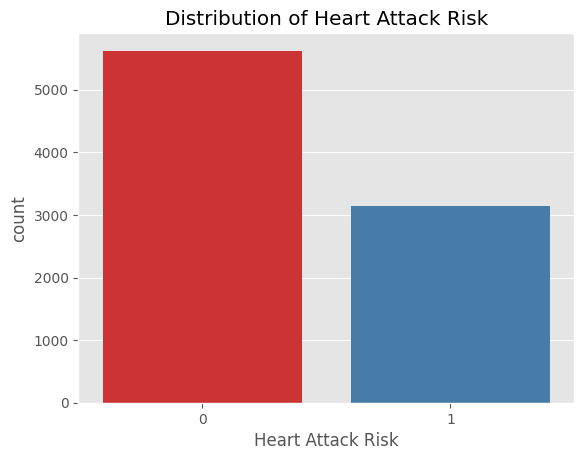

In [10]:
sns.countplot(data=df, x='Heart Attack Risk', hue='Heart Attack Risk', dodge=False, palette='Set1', legend=False)
plt.title('Distribution of Heart Attack Risk')
plt.show()

Target Value is slighlty imbalanced

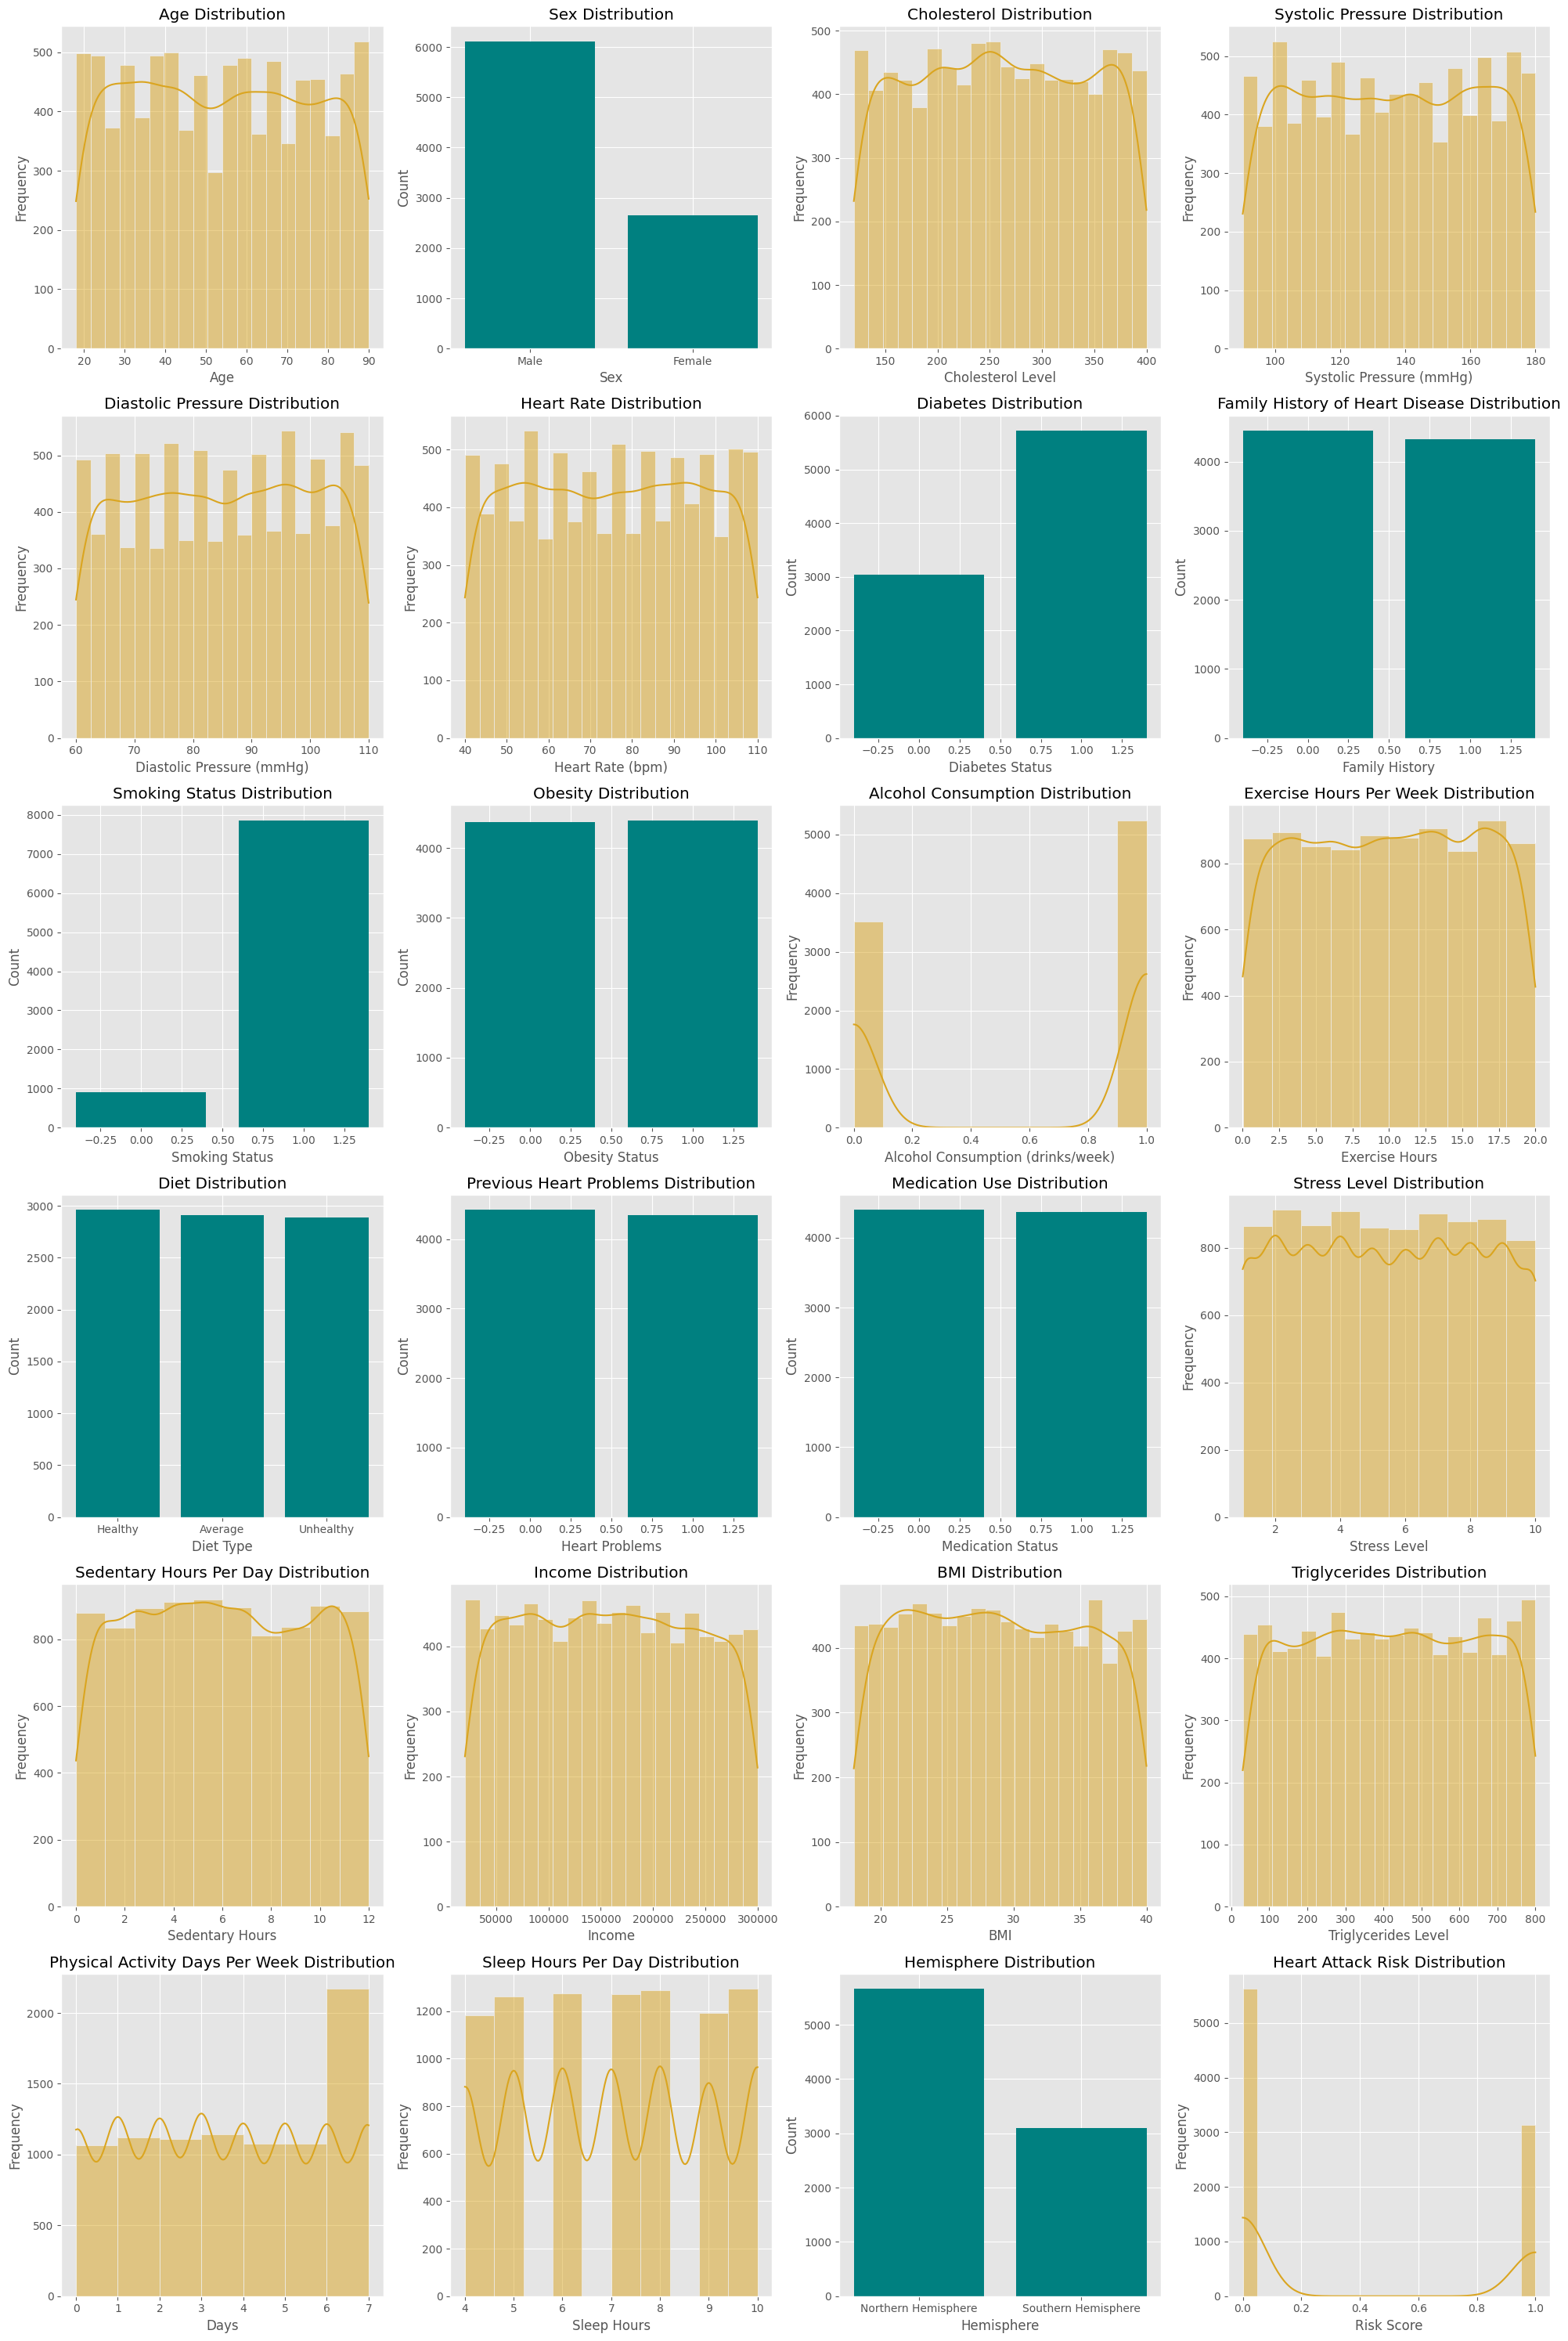

In [11]:
# Feature Visualization for Health-related Data
fig, axes = plt.subplots(6, 4, figsize=(20, 30))  # Adjusted for 24 features

# Age Distribution
sns.histplot(data=df, x='Age', bins=20, kde=True, color='goldenrod', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Sex Distribution
sex_counts = df['Sex'].value_counts()
axes[0, 1].bar(sex_counts.index, sex_counts.values, color='teal')
axes[0, 1].set_title('Sex Distribution')
axes[0, 1].set_xlabel('Sex')
axes[0, 1].set_ylabel('Count')

# Cholesterol Distribution
sns.histplot(data=df, x='Cholesterol', bins=20, kde=True, color='goldenrod', ax=axes[0, 2])
axes[0, 2].set_title('Cholesterol Distribution')
axes[0, 2].set_xlabel('Cholesterol Level')
axes[0, 2].set_ylabel('Frequency')

# Systolic Pressure Distribution
sns.histplot(data=df, x='Systolic Pressure', bins=20, kde=True, color='goldenrod', ax=axes[0, 3])
axes[0, 3].set_title('Systolic Pressure Distribution')
axes[0, 3].set_xlabel('Systolic Pressure (mmHg)')
axes[0, 3].set_ylabel('Frequency')

# Diastolic Pressure Distribution
sns.histplot(data=df, x='Diastolic Pressure', bins=20, kde=True, color='goldenrod', ax=axes[1, 0])
axes[1, 0].set_title('Diastolic Pressure Distribution')
axes[1, 0].set_xlabel('Diastolic Pressure (mmHg)')
axes[1, 0].set_ylabel('Frequency')

# Heart Rate Distribution
sns.histplot(data=df, x='Heart Rate', bins=20, kde=True, color='goldenrod', ax=axes[1, 1])
axes[1, 1].set_title('Heart Rate Distribution')
axes[1, 1].set_xlabel('Heart Rate (bpm)')
axes[1, 1].set_ylabel('Frequency')

# Diabetes Distribution
diabetes_counts = df['Diabetes'].value_counts()
axes[1, 2].bar(diabetes_counts.index, diabetes_counts.values, color='teal')
axes[1, 2].set_title('Diabetes Distribution')
axes[1, 2].set_xlabel('Diabetes Status')
axes[1, 2].set_ylabel('Count')

# Family History Distribution
family_history_counts = df['Family History'].value_counts()
axes[1, 3].bar(family_history_counts.index, family_history_counts.values, color='teal')
axes[1, 3].set_title('Family History of Heart Disease Distribution')
axes[1, 3].set_xlabel('Family History')
axes[1, 3].set_ylabel('Count')

# Smoking Status Distribution
smoking_counts = df['Smoking'].value_counts()
axes[2, 0].bar(smoking_counts.index, smoking_counts.values, color='teal')
axes[2, 0].set_title('Smoking Status Distribution')
axes[2, 0].set_xlabel('Smoking Status')
axes[2, 0].set_ylabel('Count')

# Obesity Distribution
obesity_counts = df['Obesity'].value_counts()
axes[2, 1].bar(obesity_counts.index, obesity_counts.values, color='teal')
axes[2, 1].set_title('Obesity Distribution')
axes[2, 1].set_xlabel('Obesity Status')
axes[2, 1].set_ylabel('Count')

# Alcohol Consumption Distribution
sns.histplot(data=df, x='Alcohol Consumption', bins=10, kde=True, color='goldenrod', ax=axes[2, 2])
axes[2, 2].set_title('Alcohol Consumption Distribution')
axes[2, 2].set_xlabel('Alcohol Consumption (drinks/week)')
axes[2, 2].set_ylabel('Frequency')

# Exercise Hours Per Week Distribution
sns.histplot(data=df, x='Exercise Hours Per Week', bins=10, kde=True, color='goldenrod', ax=axes[2, 3])
axes[2, 3].set_title('Exercise Hours Per Week Distribution')
axes[2, 3].set_xlabel('Exercise Hours')
axes[2, 3].set_ylabel('Frequency')

# Diet Distribution
diet_counts = df['Diet'].value_counts()
axes[3, 0].bar(diet_counts.index, diet_counts.values, color='teal')
axes[3, 0].set_title('Diet Distribution')
axes[3, 0].set_xlabel('Diet Type')
axes[3, 0].set_ylabel('Count')

# Previous Heart Problems Distribution
previous_heart_problems_counts = df['Previous Heart Problems'].value_counts()
axes[3, 1].bar(previous_heart_problems_counts.index, previous_heart_problems_counts.values, color='teal')
axes[3, 1].set_title('Previous Heart Problems Distribution')
axes[3, 1].set_xlabel('Heart Problems')
axes[3, 1].set_ylabel('Count')

# Medication Use Distribution
medication_use_counts = df['Medication Use'].value_counts()
axes[3, 2].bar(medication_use_counts.index, medication_use_counts.values, color='teal')
axes[3, 2].set_title('Medication Use Distribution')
axes[3, 2].set_xlabel('Medication Status')
axes[3, 2].set_ylabel('Count')

# Stress Level Distribution
sns.histplot(data=df, x='Stress Level', bins=10, kde=True, color='goldenrod', ax=axes[3, 3])
axes[3, 3].set_title('Stress Level Distribution')
axes[3, 3].set_xlabel('Stress Level')
axes[3, 3].set_ylabel('Frequency')

# Sedentary Hours Per Day Distribution
sns.histplot(data=df, x='Sedentary Hours Per Day', bins=10, kde=True, color='goldenrod', ax=axes[4, 0])
axes[4, 0].set_title('Sedentary Hours Per Day Distribution')
axes[4, 0].set_xlabel('Sedentary Hours')
axes[4, 0].set_ylabel('Frequency')

# Income Distribution
sns.histplot(data=df, x='Income', bins=20, kde=True, color='goldenrod', ax=axes[4, 1])
axes[4, 1].set_title('Income Distribution')
axes[4, 1].set_xlabel('Income')
axes[4, 1].set_ylabel('Frequency')

# BMI Distribution
sns.histplot(data=df, x='BMI', bins=20, kde=True, color='goldenrod', ax=axes[4, 2])
axes[4, 2].set_title('BMI Distribution')
axes[4, 2].set_xlabel('BMI')
axes[4, 2].set_ylabel('Frequency')

# Triglycerides Distribution
sns.histplot(data=df, x='Triglycerides', bins=20, kde=True, color='goldenrod', ax=axes[4, 3])
axes[4, 3].set_title('Triglycerides Distribution')
axes[4, 3].set_xlabel('Triglycerides Level')
axes[4, 3].set_ylabel('Frequency')

# Physical Activity Days Per Week Distribution
sns.histplot(data=df, x='Physical Activity Days Per Week', bins=7, kde=True, color='goldenrod', ax=axes[5, 0])
axes[5, 0].set_title('Physical Activity Days Per Week Distribution')
axes[5, 0].set_xlabel('Days')
axes[5, 0].set_ylabel('Frequency')

# Sleep Hours Per Day Distribution
sns.histplot(data=df, x='Sleep Hours Per Day', bins=10, kde=True, color='goldenrod', ax=axes[5, 1])
axes[5, 1].set_title('Sleep Hours Per Day Distribution')
axes[5, 1].set_xlabel('Sleep Hours')
axes[5, 1].set_ylabel('Frequency')

# Hemisphere Distribution
hemisphere_counts = df['Hemisphere'].value_counts()
axes[5, 2].bar(hemisphere_counts.index, hemisphere_counts.values, color='teal')
axes[5, 2].set_title('Hemisphere Distribution')
axes[5, 2].set_xlabel('Hemisphere')
axes[5, 2].set_ylabel('Count')

# Heart Attack Risk Distribution
sns.histplot(data=df, x='Heart Attack Risk', bins=20, kde=True, color='goldenrod', ax=axes[5, 3])
axes[5, 3].set_title('Heart Attack Risk Distribution')
axes[5, 3].set_xlabel('Risk Score')
axes[5, 3].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Correlation Matrix

The minimal correlations imply that **no single feature in this dataset stands out as a strong predictor** of heart attack risk.

**Highest Positive Correlation:**
Cholesterol has the highest positive correlation (0.019) with Heart Attack Risk. Although this value is low, it suggests a slight association between higher cholesterol levels and increased heart attack risk.

**Highest Negative Correlations:**
Sleep Hours Per Day (-0.018) and Alcohol Consumption (-0.013) have the highest negative correlations, suggesting a minimal relationship where more sleep and less alcohol consumption might associate slightly with lower heart attack risk. However, these correlations are so low that they are unlikely to be clinically significant.

<AxesSubplot: >

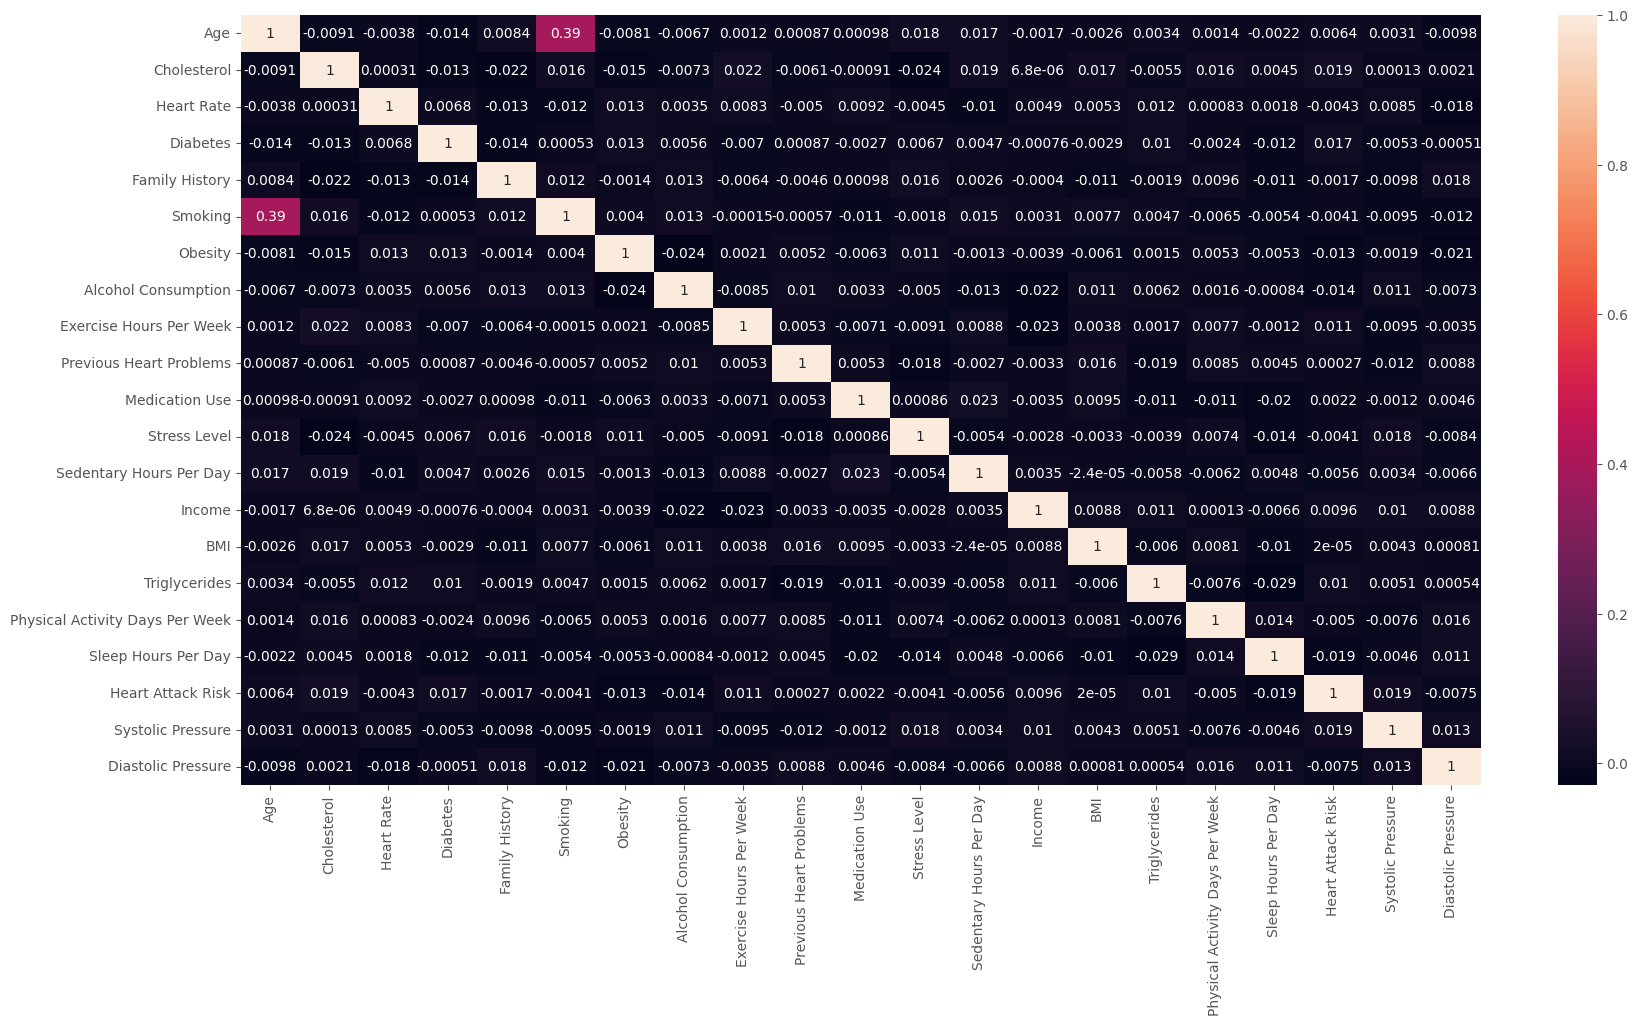

In [12]:
# heatmapping correlations between columns (without catagorized columns)

plt.figure(figsize=(20 , 10))
sns.heatmap(df.corr(numeric_only = True) , annot=True)

In [13]:
# Calculate correlation matrix and sort by absolute correlation with 'Heart Attack Risk'
corr_matrix = df.corr(numeric_only=True)
target_corr = corr_matrix['Heart Attack Risk'].drop('Heart Attack Risk').sort_values(key=abs, ascending=False)

# Print the sorted correlation values
print("Correlation of Features with Heart Attack Risk:")
print(target_corr)

Correlation of Features with Heart Attack Risk:
Cholesterol                        0.019340
Systolic Pressure                  0.018585
Sleep Hours Per Day               -0.018528
Diabetes                           0.017225
Alcohol Consumption               -0.013778
Obesity                           -0.013318
Exercise Hours Per Week            0.011133
Triglycerides                      0.010471
Income                             0.009628
Diastolic Pressure                -0.007509
Age                                0.006403
Sedentary Hours Per Day           -0.005613
Physical Activity Days Per Week   -0.005014
Heart Rate                        -0.004251
Stress Level                      -0.004111
Smoking                           -0.004051
Medication Use                     0.002234
Family History                    -0.001652
Previous Heart Problems            0.000274
BMI                                0.000020
Name: Heart Attack Risk, dtype: float64


## Distribution of numerical features

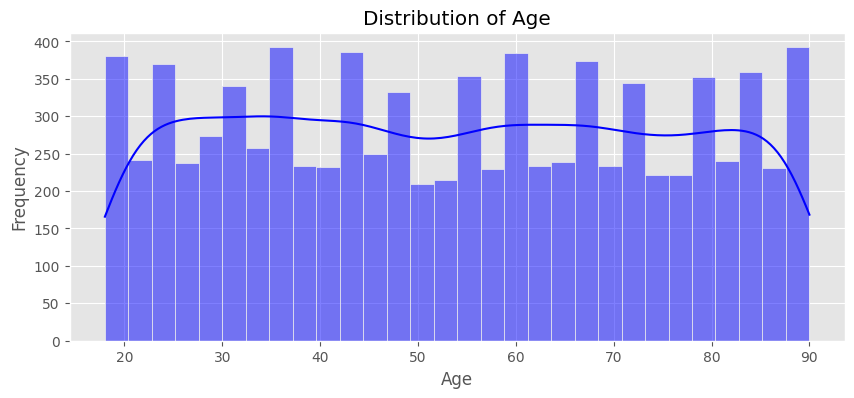

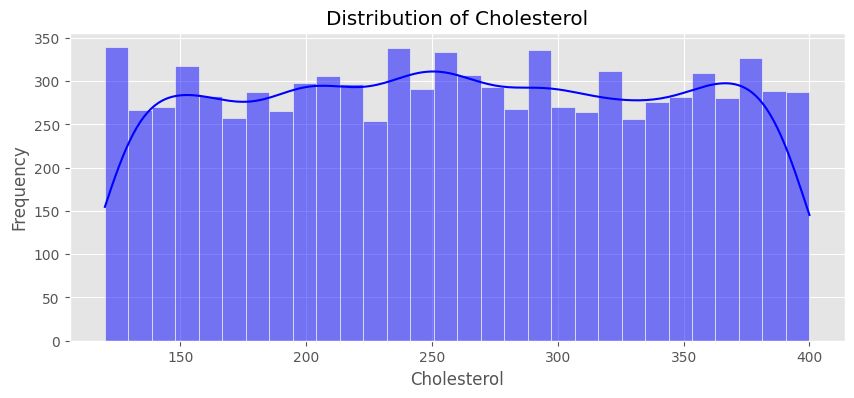

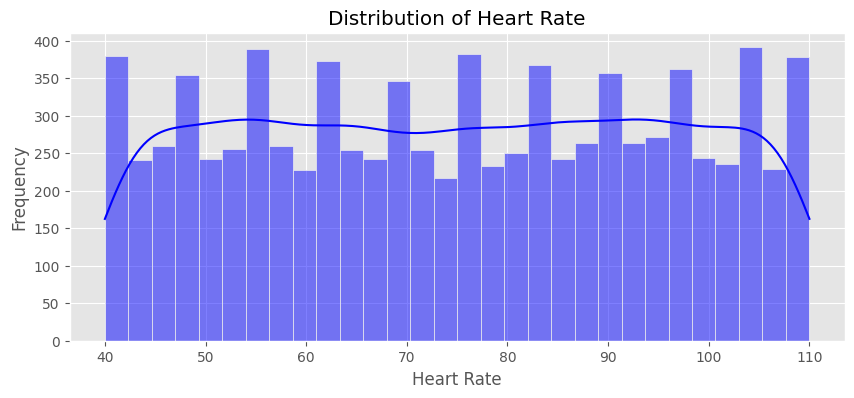

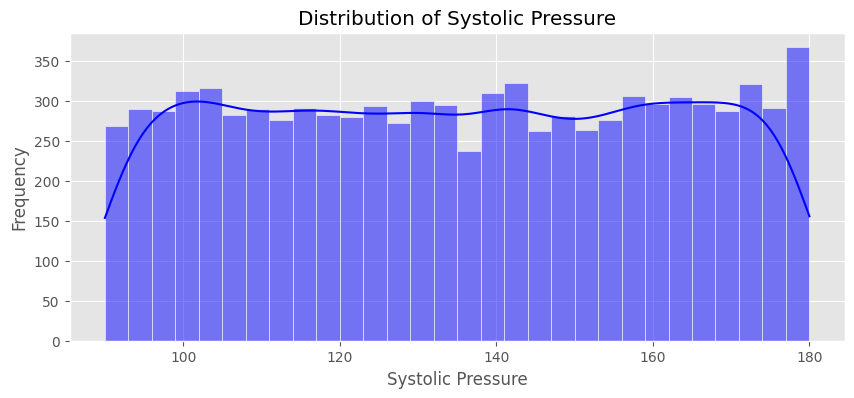

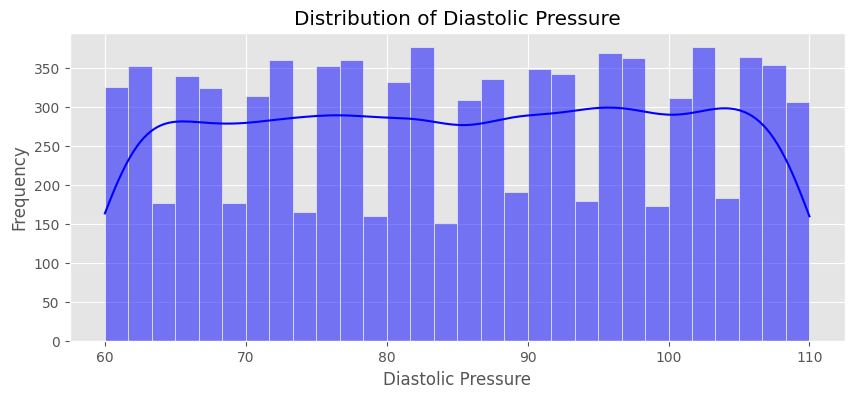

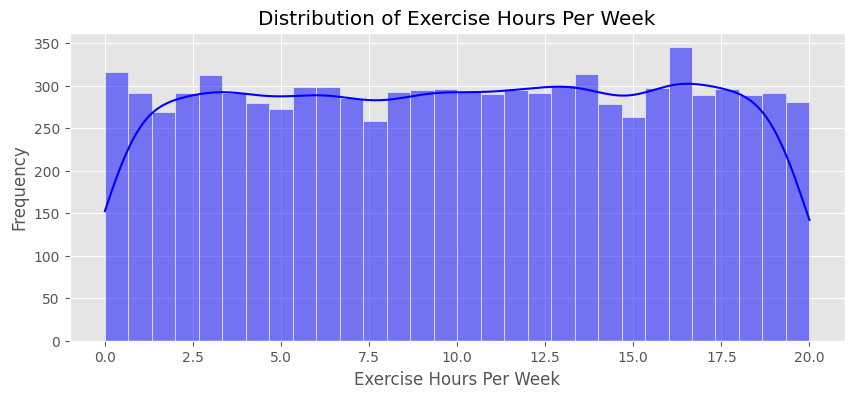

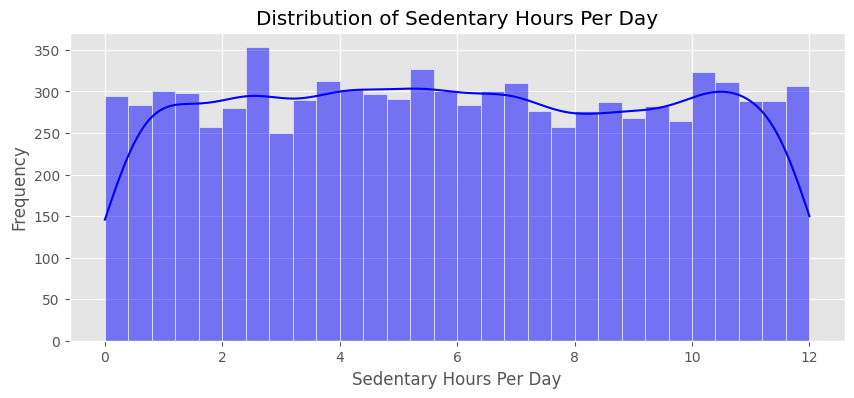

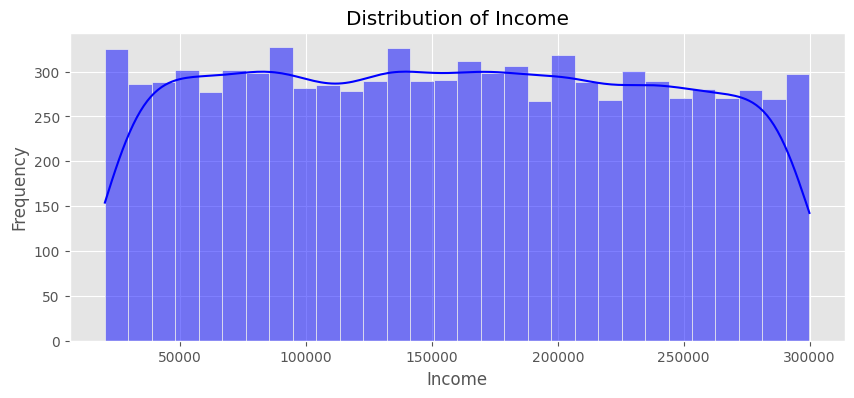

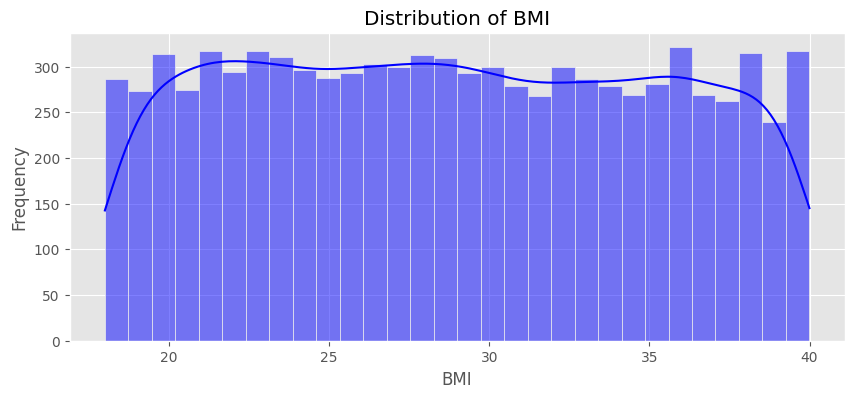

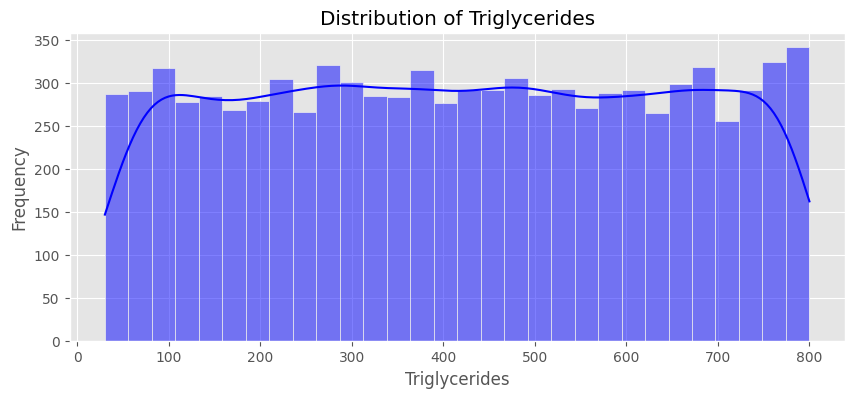

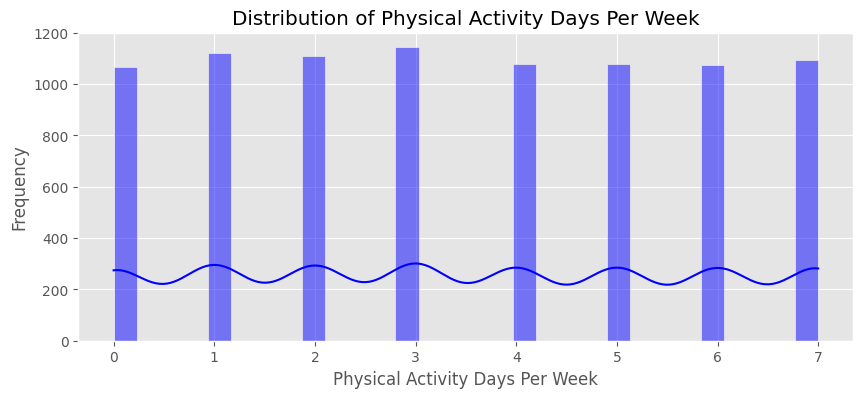

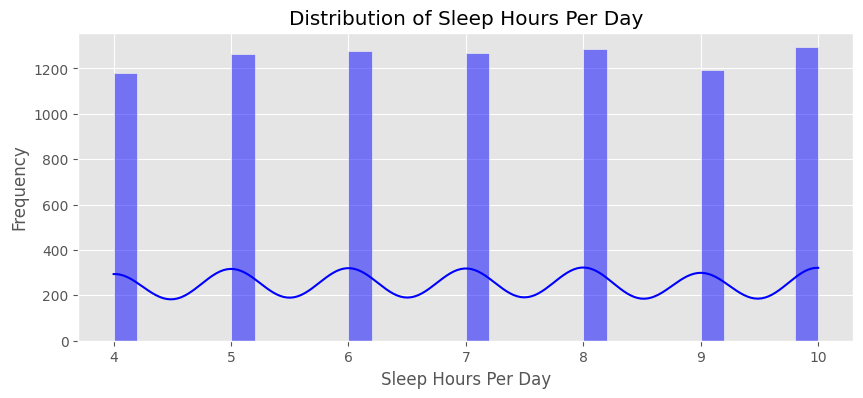

In [14]:
numerical_features = ['Age', 'Cholesterol', 'Heart Rate', 'Systolic Pressure', 'Diastolic Pressure', 'Exercise Hours Per Week', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

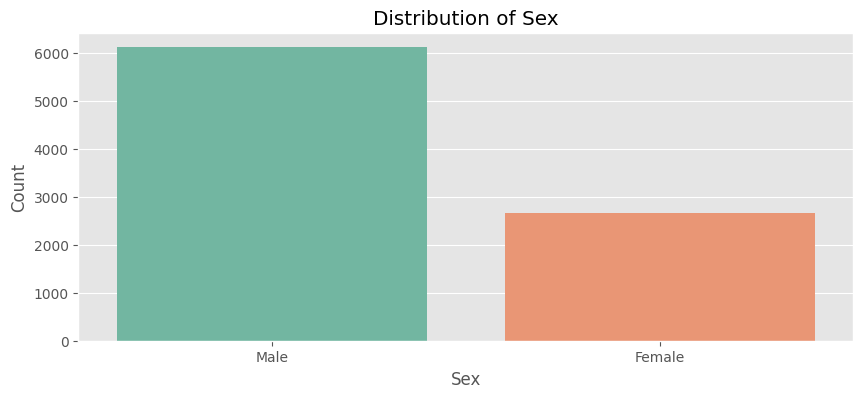

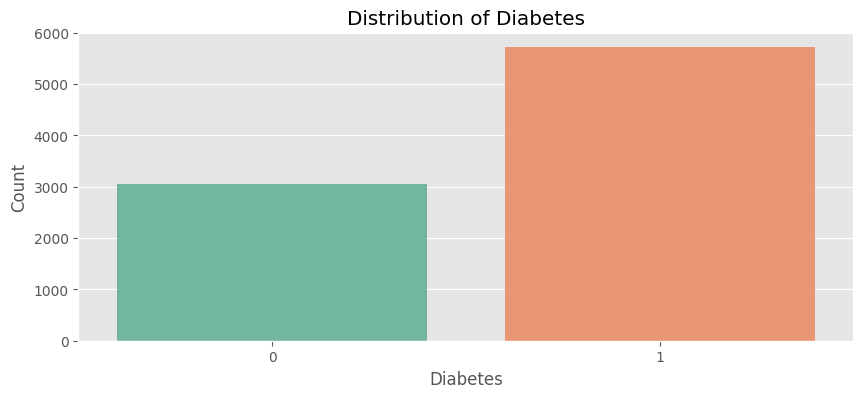

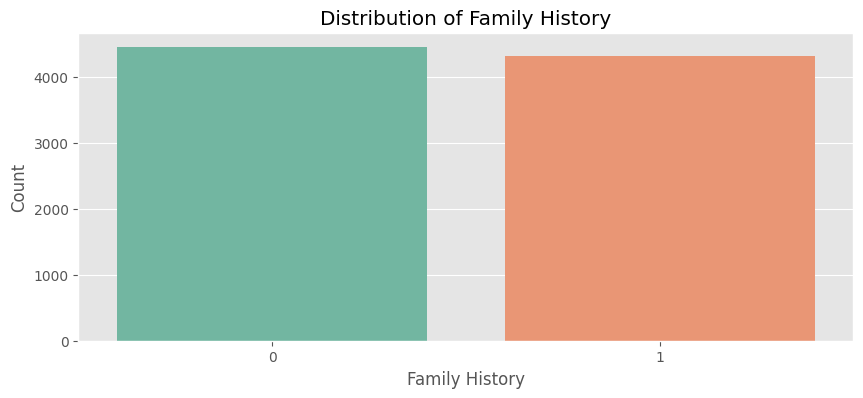

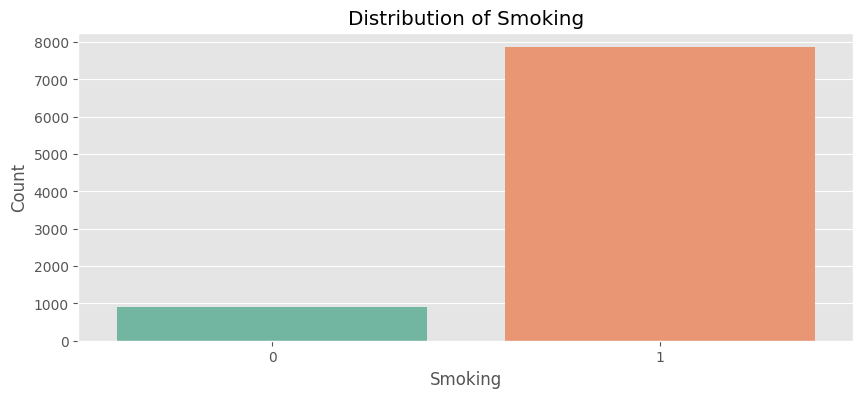

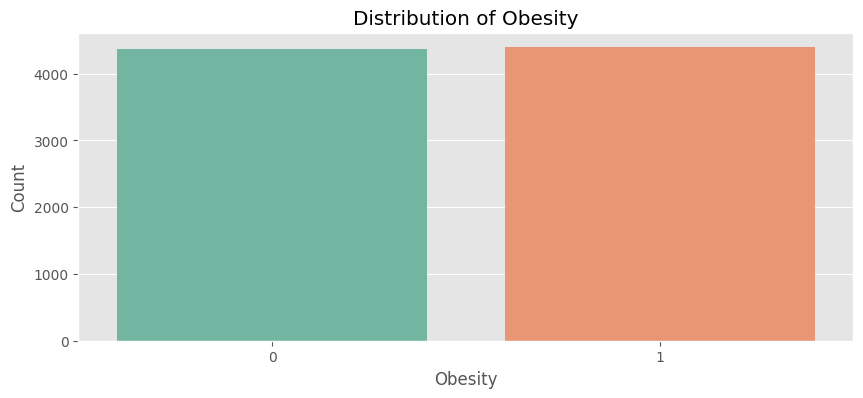

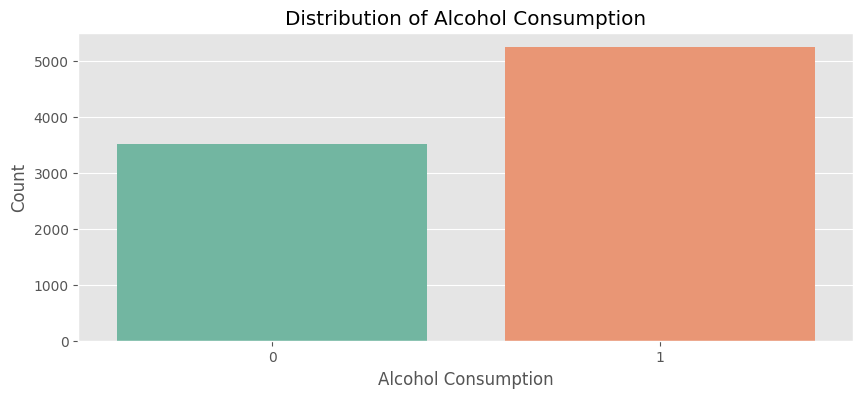

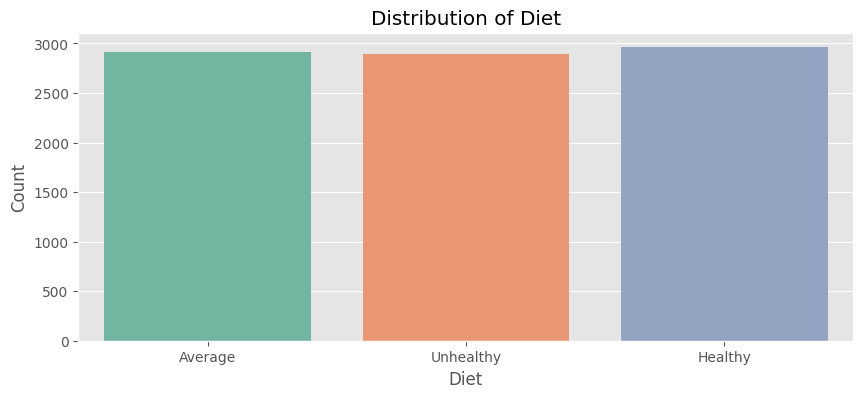

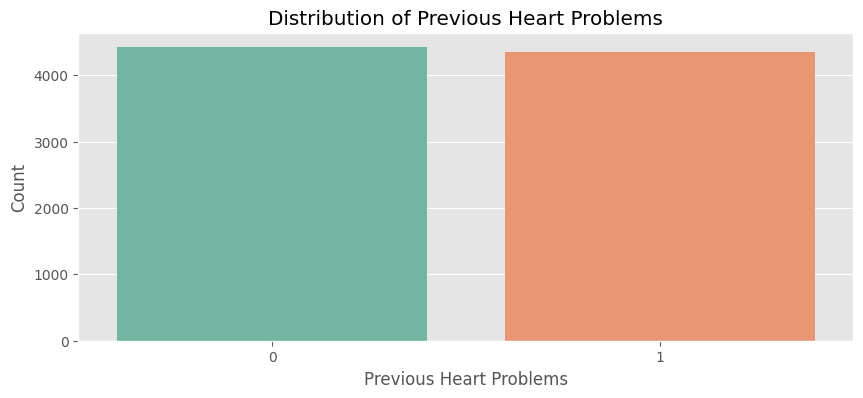

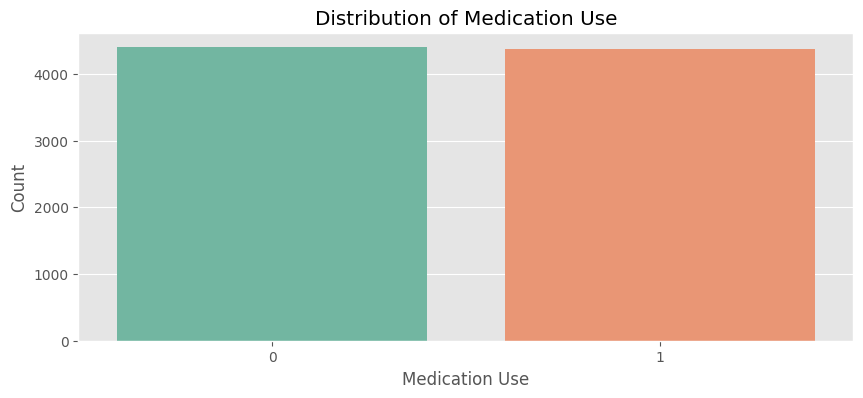

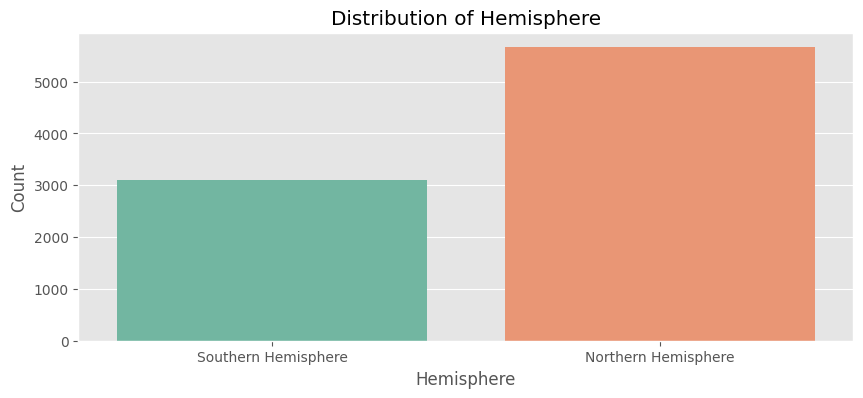

In [15]:
categorical_features = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
                        'Alcohol Consumption', 'Diet', 'Previous Heart Problems',
                        'Medication Use', 'Hemisphere']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df_original, x=feature, hue=feature, dodge=False, palette='Set2', legend=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend([],[], frameon=False)  # Remove extra legend
    plt.show()

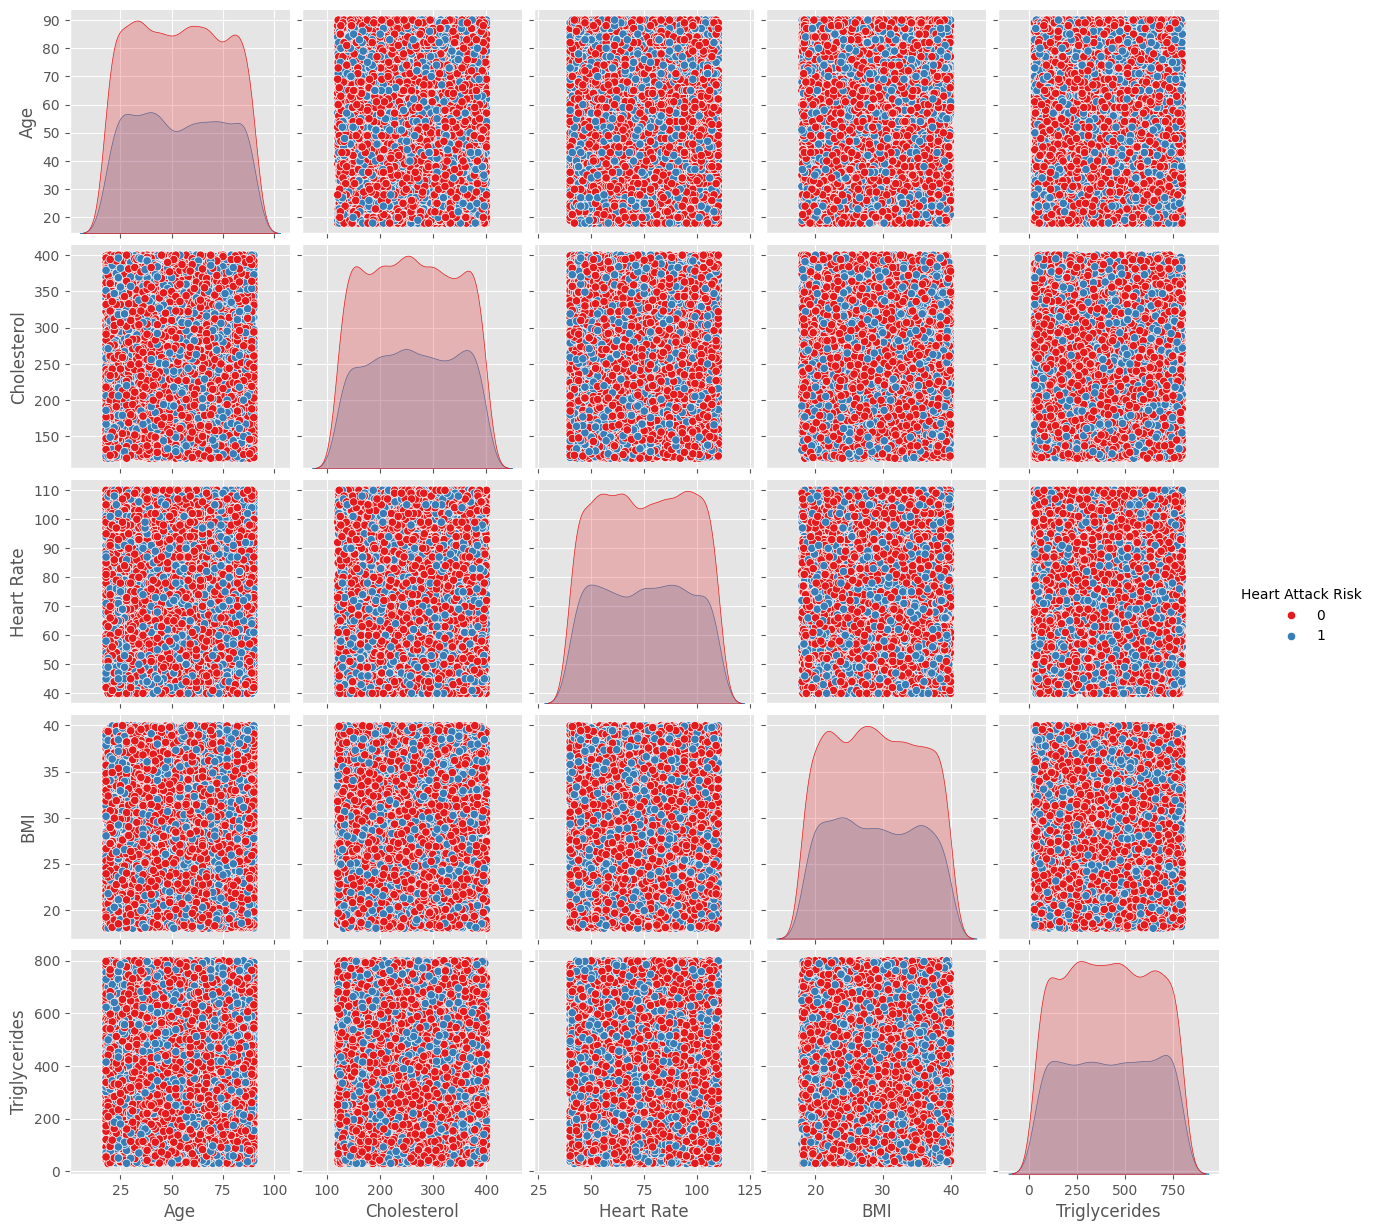

In [16]:
# Pairplot for selected features to visualize relationships
selected_features = ['Age', 'Cholesterol', 'Heart Rate', 'BMI', 'Triglycerides', 'Heart Attack Risk']
sns.pairplot(df[selected_features], hue='Heart Attack Risk', palette='Set1')
plt.show()

# Data Cleaning

**Handling Object Columns**

In [17]:
# Display columns of object data type
object_columns = df.select_dtypes(include=['object']).columns
print("Object columns in the DataFrame:", object_columns)

Object columns in the DataFrame: Index(['Sex', 'Diet', 'Hemisphere'], dtype='object')


In [18]:
object_cols = df.select_dtypes('object').nunique().sort_values(ascending=False).head(3).index
object_cols

Index(['Diet', 'Sex', 'Hemisphere'], dtype='object')

In [19]:
for col in object_cols:
    lb = LabelEncoder()
    df[col]=lb.fit_transform(df[col])

In [20]:
# Check for columns with 'object' data type
object_columns = df.select_dtypes(include='object').columns

# Print message based on the presence of object columns
if object_columns.empty:
    print("There are no Object columns in df")
else:
    print("Object columns:", object_columns)

There are no Object columns in df


# Modeling

## Basic models pipeline

In [21]:
def plot_confusion_matrix(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(4, 4))
    disp.plot(cmap="Reds", ax=ax)
    ax.set_title(f"Confusion Matrix - {model_name}", fontsize=10)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)
    ax.set_xticklabels(ax.get_xticks(), fontsize=6)
    ax.set_yticklabels(ax.get_yticks(), fontsize=6)
    ax.grid(False)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [22]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Hemisphere',
       'Heart Attack Risk', 'Systolic Pressure', 'Diastolic Pressure'],
      dtype='object')

In [23]:
# Splitting the data

X = df.drop(columns=['Heart Attack Risk'])
y = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Define classifiers with SMOTE added to the pipeline
classifiers = {
    'Decision Tree': ImbPipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),

    'Logistic Regression': ImbPipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(random_state=42, max_iter=2000, class_weight='balanced'))
    ]),

    'XGBoost': ImbPipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
    ]),

    'Random Forest': ImbPipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=42))
    ])
}


Evaluating Model: Decision Tree

Decision Tree Performance Metrics:

########################################
	Accuracy: 0.54
	Recall: 0.41
	F1 Score: 0.39
########################################



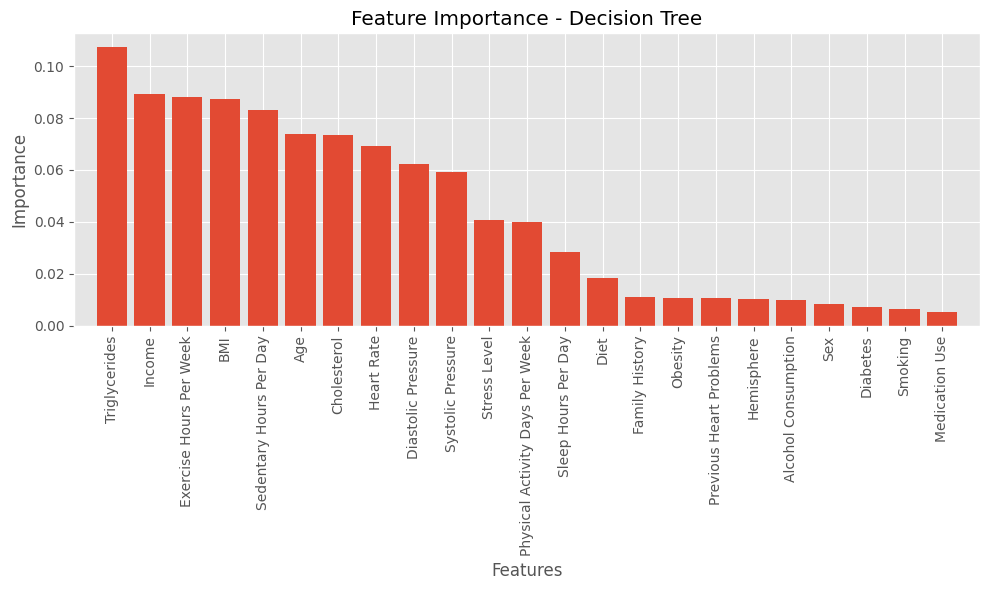

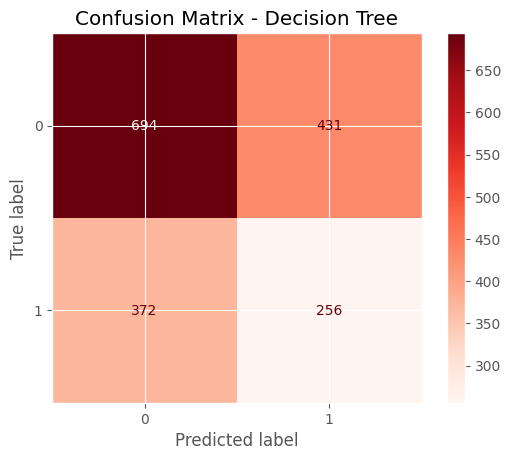


Evaluating Model: Logistic Regression

Logistic Regression Performance Metrics:

########################################
	Accuracy: 0.49
	Recall: 0.49
	F1 Score: 0.40
########################################



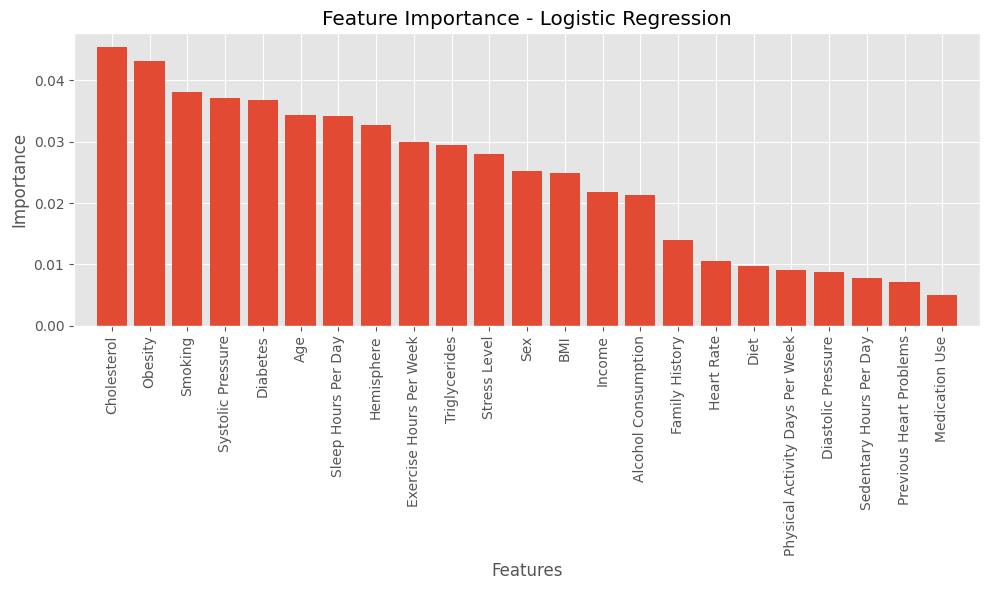

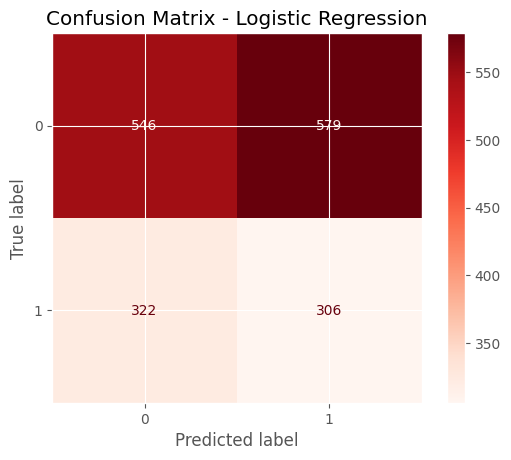


Evaluating Model: XGBoost

/root/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [14:58:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
XGBoost Performance Metrics:

########################################
	Accuracy: 0.60
	Recall: 0.22
	F1 Score: 0.28
########################################



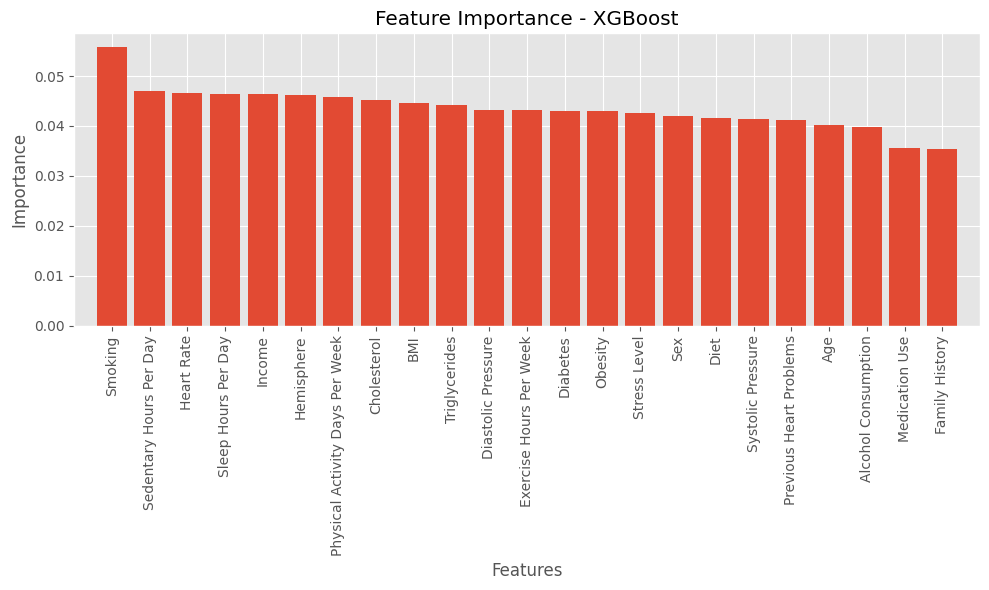

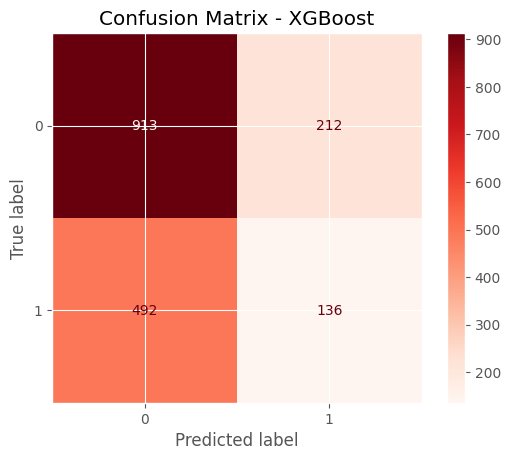


Evaluating Model: Random Forest

Random Forest Performance Metrics:

########################################
	Accuracy: 0.63
	Recall: 0.02
	F1 Score: 0.03
########################################



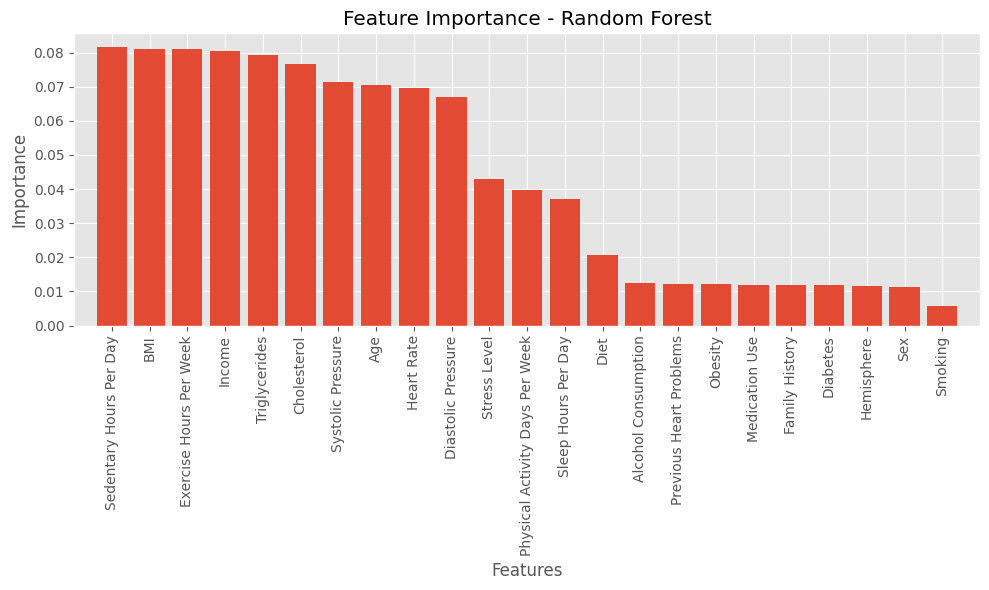

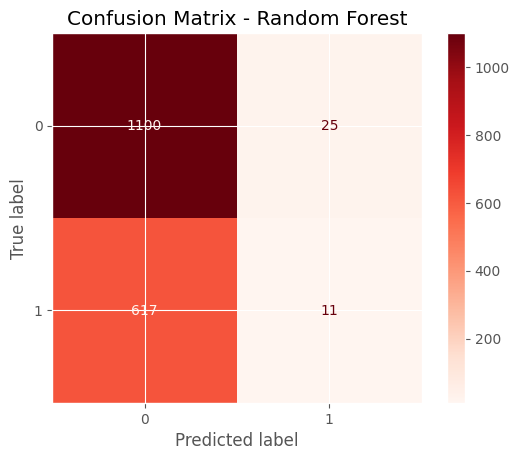

In [25]:
# Train and evaluate each classifier
for name, model in classifiers.items():
    print("\n" + "="*40)
    print(f"Evaluating Model: {name}")
    print("="*40 + "\n")

    # Fit the pipeline
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='binary')  # Changed to 'binary' to correctly reflect the recall for the positive class
    f1 = f1_score(y_test, y_pred, average='binary')  # Changed to 'binary' for accurate F1 score calculation

    print(f"{name} Performance Metrics:\n")
    print("#"*40)
    print(f"\tAccuracy: {accuracy:.2f}\n\tRecall: {recall:.2f}\n\tF1 Score: {f1:.2f}")
    print("#"*40 + "\n")

    # Extract feature importances or coefficients
    if hasattr(model.named_steps['classifier'], 'feature_importances_'):
        importances = model.named_steps['classifier'].feature_importances_
    elif hasattr(model.named_steps['classifier'], 'coef_'):
        importances = model.named_steps['classifier'].coef_[0]
    else:
        importances = None

    # Plot feature importance if available
    if importances is not None:
        feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i}' for i in range(len(importances))]
        indices = np.argsort(np.abs(importances))[::-1]  # Sort based on absolute values

        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance - {name}')
        plt.bar(range(len(importances)), np.abs(importances)[indices], align='center')
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
        plt.xlim([-1, len(importances)])
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.tight_layout()
        plt.show()

    # Confusion Matrix to check true and false positives/negatives
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Reds")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

## Logistic Regressions improvements



Engaging SMOTE to all classifiers, due to imbalanced target value. We will evalute the models before and after SMOTE.


Evaluating Model: Decision Tree

Decision Tree Performance Metrics (Before SMOTE):

########################################
	Accuracy: 0.54
	Recall: 0.41
	F1 Score: 0.39
########################################



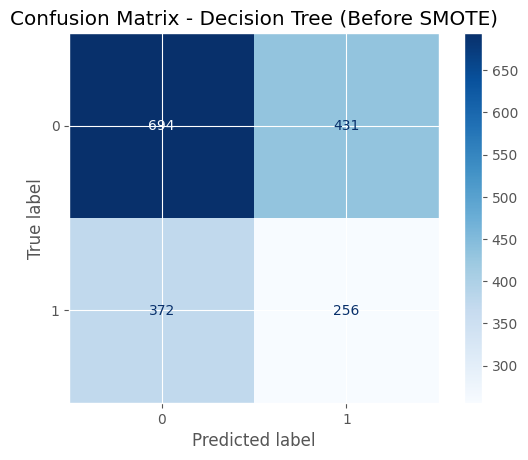

Decision Tree Performance Metrics (After SMOTE):

########################################
	Accuracy: 0.54
	Recall: 0.37
	F1 Score: 0.36
########################################



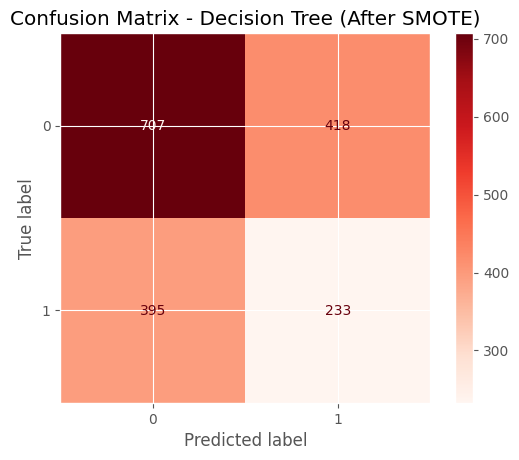


Evaluating Model: Logistic Regression

Logistic Regression Performance Metrics (Before SMOTE):

########################################
	Accuracy: 0.49
	Recall: 0.49
	F1 Score: 0.40
########################################



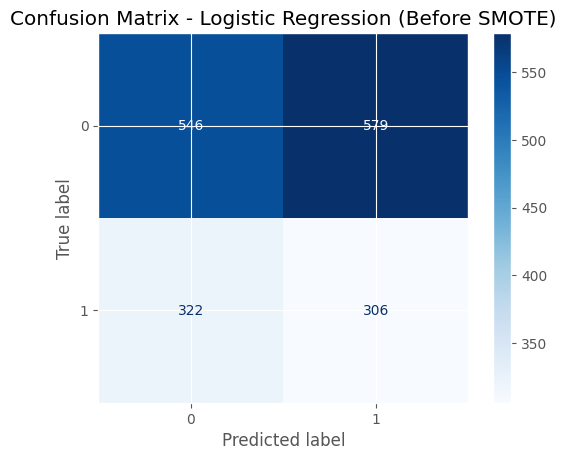

Logistic Regression Performance Metrics (After SMOTE):

########################################
	Accuracy: 0.49
	Recall: 0.49
	F1 Score: 0.41
########################################



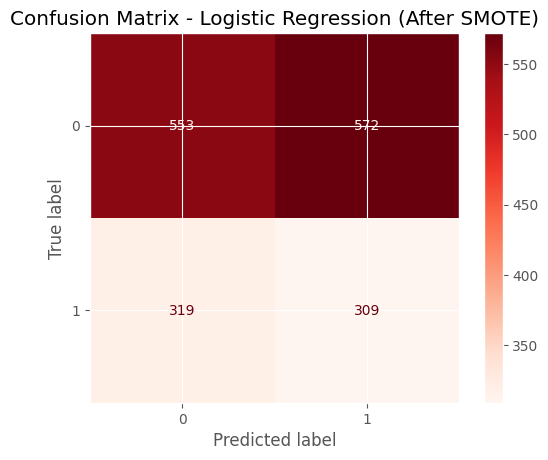


Evaluating Model: XGBoost

/root/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [14:58:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
XGBoost Performance Metrics (Before SMOTE):

########################################
	Accuracy: 0.60
	Recall: 0.22
	F1 Score: 0.28
########################################



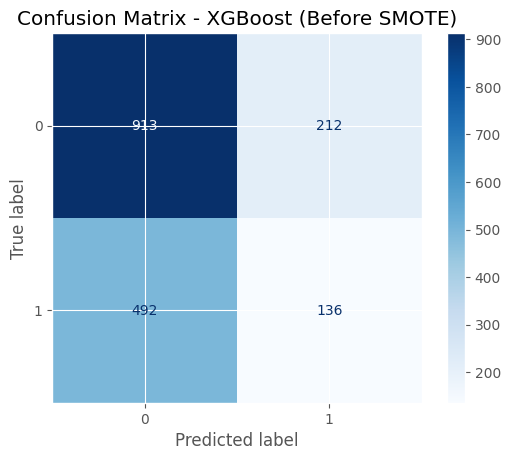

/root/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [14:58:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
XGBoost Performance Metrics (After SMOTE):

########################################
	Accuracy: 0.59
	Recall: 0.24
	F1 Score: 0.29
########################################



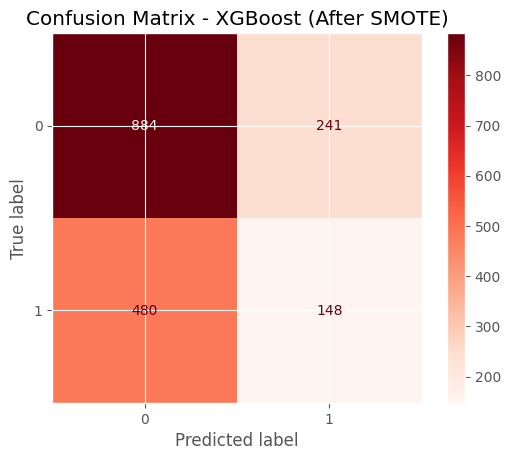


Evaluating Model: Random Forest

Random Forest Performance Metrics (Before SMOTE):

########################################
	Accuracy: 0.63
	Recall: 0.02
	F1 Score: 0.03
########################################



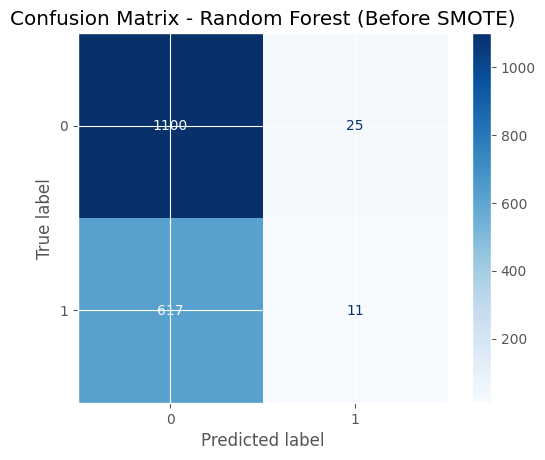

Random Forest Performance Metrics (After SMOTE):

########################################
	Accuracy: 0.61
	Recall: 0.11
	F1 Score: 0.16
########################################



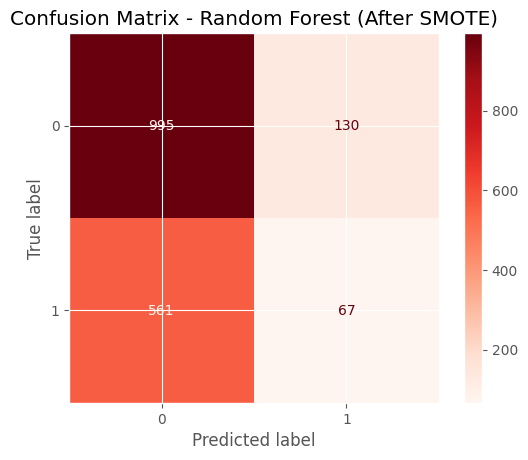

In [27]:
# Prepare the data
X = df.drop(columns=['Heart Attack Risk'])
y = df['Heart Attack Risk']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers without SMOTE and with SMOTE
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000, class_weight='balanced'),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Loop over classifiers to evaluate each model with and without SMOTE
for name, clf in classifiers.items():
    print("\n" + "="*40)
    print(f"Evaluating Model: {name}")
    print("="*40 + "\n")

    # Without SMOTE
    no_smote_pipeline = ImbPipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])

    no_smote_pipeline.fit(X_train, y_train)
    y_pred_no_smote = no_smote_pipeline.predict(X_test)

    # Metrics without SMOTE
    accuracy_no_smote = accuracy_score(y_test, y_pred_no_smote)
    recall_no_smote = recall_score(y_test, y_pred_no_smote, average='binary')
    f1_no_smote = f1_score(y_test, y_pred_no_smote, average='binary')

    print(f"{name} Performance Metrics (Before SMOTE):\n")
    print("#"*40)
    print(f"\tAccuracy: {accuracy_no_smote:.2f}\n\tRecall: {recall_no_smote:.2f}\n\tF1 Score: {f1_no_smote:.2f}")
    print("#"*40 + "\n")

    # Confusion Matrix before SMOTE
    cm_no_smote = confusion_matrix(y_test, y_pred_no_smote)
    disp_no_smote = ConfusionMatrixDisplay(confusion_matrix=cm_no_smote)
    disp_no_smote.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name} (Before SMOTE)")
    plt.show()

    # With SMOTE
    smote_pipeline = ImbPipeline(steps=[
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', clf)
    ])

    smote_pipeline.fit(X_train, y_train)
    y_pred_smote = smote_pipeline.predict(X_test)

    # Metrics with SMOTE
    accuracy_smote = accuracy_score(y_test, y_pred_smote)
    recall_smote = recall_score(y_test, y_pred_smote, average='binary')
    f1_smote = f1_score(y_test, y_pred_smote, average='binary')

    print(f"{name} Performance Metrics (After SMOTE):\n")
    print("#"*40)
    print(f"\tAccuracy: {accuracy_smote:.2f}\n\tRecall: {recall_smote:.2f}\n\tF1 Score: {f1_smote:.2f}")
    print("#"*40 + "\n")

    # Confusion Matrix after SMOTE
    cm_smote = confusion_matrix(y_test, y_pred_smote)
    disp_smote = ConfusionMatrixDisplay(confusion_matrix=cm_smote)
    disp_smote.plot(cmap="Reds")
    plt.title(f"Confusion Matrix - {name} (After SMOTE)")
    plt.show()

Only XGBoost & Random Forest classifiers improved using SMOTE in terms of Recall and F1 score. However, as **Logistic Regression** classifier beat them all in terms of evaluation metrics, we will try to improve it with feature selection.

## Feature selection

In [28]:
# # Store feature importances
# feature_importances = {}

# # Train and evaluate each classifier to get feature importances
# for name, model in classifiers.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     accuracy = accuracy_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred, average='weighted')  # Calculate Recall with weighted averaging
#     f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate F1 score with weighted averaging

#     print(f"{name} - Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

#     # Extract feature importances or coefficients
#     if name in ['Decision Tree', 'Random Forest', 'XGBoost']:
#         importances = model.named_steps['classifier'].feature_importances_
#     elif name == 'Logistic Regression':
#         importances = model.named_steps['classifier'].coef_[0]  # Get the coefficients
#     else:
#         importances = None

#     # Store importances for later use
#     feature_importances[name] = importances

# # Create a new DataFrame to store the feature importances
# importance_df = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Decision Tree': feature_importances['Decision Tree'],
#     'Logistic Regression': feature_importances['Logistic Regression'],
#     'XGBoost': feature_importances['XGBoost'],
#     'Random Forest': feature_importances['Random Forest']
# })

# # Identify the top 10 features for each model
# top_features = {}
# for name in classifiers.keys():
#     if name in ['Decision Tree', 'Random Forest', 'XGBoost']:
#         top_n = importance_df.nlargest(10, name)
#     elif name == 'Logistic Regression':
#         abs_importances = np.abs(importance_df[name])
#         top_n = importance_df.loc[abs_importances.nlargest(10).index]

#     top_features[name] = top_n['Feature'].values

# # Create a new DataFrame to hold the top features
# X_train_top = X_train[top_features['Decision Tree']]
# X_test_top = X_test[top_features['Decision Tree']]

# # Train the models again using only the top features
# for name in classifiers.keys():
#     if name == 'Decision Tree':
#         X_train_selected = X_train[top_features[name]]
#         X_test_selected = X_test[top_features[name]]
#     else:
#         # Use the same top features for all classifiers
#         X_train_selected = X_train[top_features['Decision Tree']]
#         X_test_selected = X_test[top_features['Decision Tree']]

#     model = classifiers[name]
#     model.fit(X_train_selected, y_train)
#     y_pred = model.predict(X_test_selected)

#     accuracy = accuracy_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred, average='weighted')  # Calculate Recall with weighted averaging
#     f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate F1 score with weighted averaging

#     print(f"After feature selection - {name} - Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

In [29]:
# Define Logistic Regression classifiers without and with SMOTE
lr_no_smote_pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=2000, class_weight='balanced'))
])

lr_smote_pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, max_iter=2000, class_weight='balanced'))
])

# Function to evaluate Logistic Regression classifiers
def evaluate_model(model, X_train, y_train, X_test, y_test, with_smote=False):
    print("\n" + "="*40)
    smote_status = "with SMOTE" if with_smote else "without SMOTE"
    print(f"Evaluating Model: Logistic Regression ({smote_status})")
    print("="*40 + "\n")

    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    print(f"Performance Metrics:\n")
    print("#" * 40)
    print(f"\tAccuracy: {accuracy:.2f}\n\tRecall: {recall:.2f}\n\tF1 Score: {f1:.2f}")
    print("#" * 40 + "\n")

    return model

# Step 1: Evaluate Logistic Regression with and without SMOTE
lr_no_smote_pipeline = evaluate_model(lr_no_smote_pipeline, X_train, y_train, X_test, y_test, with_smote=False)
lr_smote_pipeline = evaluate_model(lr_smote_pipeline, X_train, y_train, X_test, y_test, with_smote=True)

# Step 2: Feature Importance and Top Features
for name, model in [("Logistic Regression (no SMOTE)", lr_no_smote_pipeline),
                    ("Logistic Regression (with SMOTE)", lr_smote_pipeline)]:
    # print("\n" + "="*40)
    # print(f"Extracting Feature Importance: {name}")
    # print("="*40 + "\n")

    # Get feature coefficients
    importances = model.named_steps['classifier'].coef_[0]
    feature_names = X.columns
    sorted_indices = np.argsort(np.abs(importances))[::-1]
    top_10_features = feature_names[sorted_indices][:10]

# Step 3: Re-train and evaluate using only top 10 features
for name, model in [("Logistic Regression (no SMOTE)", lr_no_smote_pipeline),
                    ("Logistic Regression (with SMOTE)", lr_smote_pipeline)]:
    # print("\n" + "="*40)
    # print(f"Re-evaluating Model with Top Features: {name}")
    # print("="*40 + "\n")

    # Use only top 10 selected features for train and test sets
    importances = model.named_steps['classifier'].coef_[0]
    feature_names = X.columns
    sorted_indices = np.argsort(np.abs(importances))[::-1]
    top_10_features = feature_names[sorted_indices][:10]

    X_train_top = X_train[top_10_features]
    X_test_top = X_test[top_10_features]

    # Train and predict using the selected top features
    model.fit(X_train_top, y_train)
    y_pred = model.predict(X_test_top)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    smote_status = "with SMOTE" if "with SMOTE" in name else "without SMOTE"
    print(f"\nAfter Feature Selection - Logistic Regression ({smote_status}) - "
          f"Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


Evaluating Model: Logistic Regression (without SMOTE)

Performance Metrics:

########################################
	Accuracy: 0.49
	Recall: 0.49
	F1 Score: 0.40
########################################


Evaluating Model: Logistic Regression (with SMOTE)

Performance Metrics:

########################################
	Accuracy: 0.49
	Recall: 0.49
	F1 Score: 0.41
########################################


After Feature Selection - Logistic Regression (without SMOTE) - Accuracy: 0.49, Recall: 0.51, F1 Score: 0.42

After Feature Selection - Logistic Regression (with SMOTE) - Accuracy: 0.49, Recall: 0.51, F1 Score: 0.42


**Impact of Feature Selection**
We evaluate heart attack risk models based on Recall and F1-score because it's critical to identify as many at-risk individuals as possible (high Recall) to avoid missing potential heart attacks. The F1-score balances Recall and Precision, ensuring the model accurately detects risks without generating too many false alarms, which is vital in healthcare settings.

Feature selection did not lead to a significant improvement in accuracy or recall for our selected model, Logistic Regression.

## Hyperparameter tuning (Grid Search)

**Let's use Hyperparameter tuning (Grid Search) for our Logistic Regression model!**

In [30]:
# # Step 1: Fit Random Forest and Extract Feature Importances
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train, y_train)

# # Step 2: Create DataFrame for feature importances
# importance_df = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': rf_model.feature_importances_
# })

# # Step 3: Select the top 10 features based on importance
# top_features_rf = importance_df.nlargest(10, 'Importance')['Feature'].values

# # Step 4: Filter the training and test sets to only include these top features
# X_train_top_rf = X_train[top_features_rf]
# X_test_top_rf = X_test[top_features_rf]

# # Step 5: Define the Random Forest model and parameter grid for GridSearchCV
# rf_model = RandomForestClassifier(random_state=42)
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }

# # Step 6: Set up GridSearchCV, focusing on recall as the primary metric
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
#                            scoring='recall_weighted', cv=3, verbose=2, n_jobs=-1)

# # Step 7: Fit the model using only the top features selected from Random Forest
# grid_search.fit(X_train_top_rf, y_train)

# # Step 8: Get the best parameters and the best recall score
# best_params = grid_search.best_params_
# best_recall_score = grid_search.best_score_

# # Step 9: Evaluate the best estimator on the test set
# best_rf_model = grid_search.best_estimator_
# y_pred_test = best_rf_model.predict(X_test_top_rf)

# # Calculate accuracy, recall, and F1 score on the test set
# accuracy_test = accuracy_score(y_test, y_pred_test)
# recall_test = recall_score(y_test, y_pred_test, average='weighted')
# f1_test = f1_score(y_test, y_pred_test, average='weighted')

# # Print the results with a focus on recall
# print(f"Best Parameters: {best_params}")
# print(f"Best Recall Score (train): {best_recall_score:.2f}")
# print(f"Test Accuracy: {accuracy_test:.2f}, Test Recall: {recall_test:.2f}, Test F1 Score: {f1_test:.2f}")

# # Step 10: Plot confusion matrix to visualize the recall performance
# fig, ax = plt.subplots(figsize=(6, 6))
# ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test_top_rf, y_test, cmap="Reds", ax=ax)
# plt.title("Confusion Matrix - Best Random Forest Model (After Grid Search)")
# plt.show()

In [36]:
# Define the parameter grid for Logistic Regression
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__solver': ['liblinear', 'saga'],  # Solvers suitable for small datasets
    'classifier__penalty': ['l1', 'l2']  # Regularization type
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=lr_smote_pipeline, param_grid=param_grid,
                           scoring='f1_weighted', cv=3, verbose=2)

# Fit the model using the existing lr_smote_pipeline
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_f1_score = grid_search.best_score_

# Optionally, evaluate the best estimator on the test set
best_lr_model = grid_search.best_estimator_
y_pred_test = best_lr_model.predict(X_test)

# Calculate accuracy, recall, and F1 score on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Print the results together
print(f"Best Parameters: {best_params}")
print(f"Best F1 Score (train): {best_f1_score:.2f}")
print(f"Test Accuracy: {accuracy_test:.2f}, Test Recall: {recall_test:.2f}, Test F1 Score: {f1_test:.2f}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__C=0.001, classifier__penalty=l1, classifier__solver=saga; total time=   0.0s
[CV] END classifier__C=0.001, classifier__penalty=l1, classifier__solver=saga; total time=   0.2s
[CV] END classifier__C=0.001, classifier__penalty=l1, classifier__solver=saga; total time=   0.1s
[CV] END classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__C=0.00

The model evaluation did not change much.

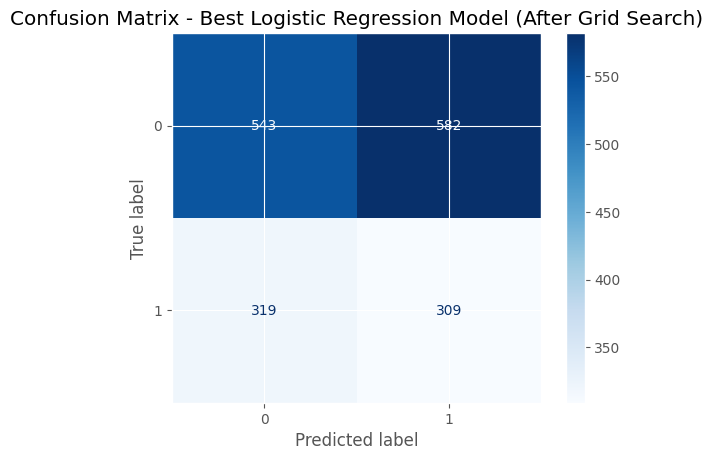

In [43]:
# Confusion Matrix for the best Logistic Regression model
cm_best_lr = confusion_matrix(y_test, y_pred_test)
disp_best_lr = ConfusionMatrixDisplay(confusion_matrix=cm_best_lr)
disp_best_lr.plot(cmap="Blues")
plt.title("Confusion Matrix - Best Logistic Regression Model (After Grid Search)")
plt.show()

The confusion matrix and metrics for the best-selected Logistic Regression model after grid search have been plotted and displayed.

**Models ROC Curves**

/root/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [14:58:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


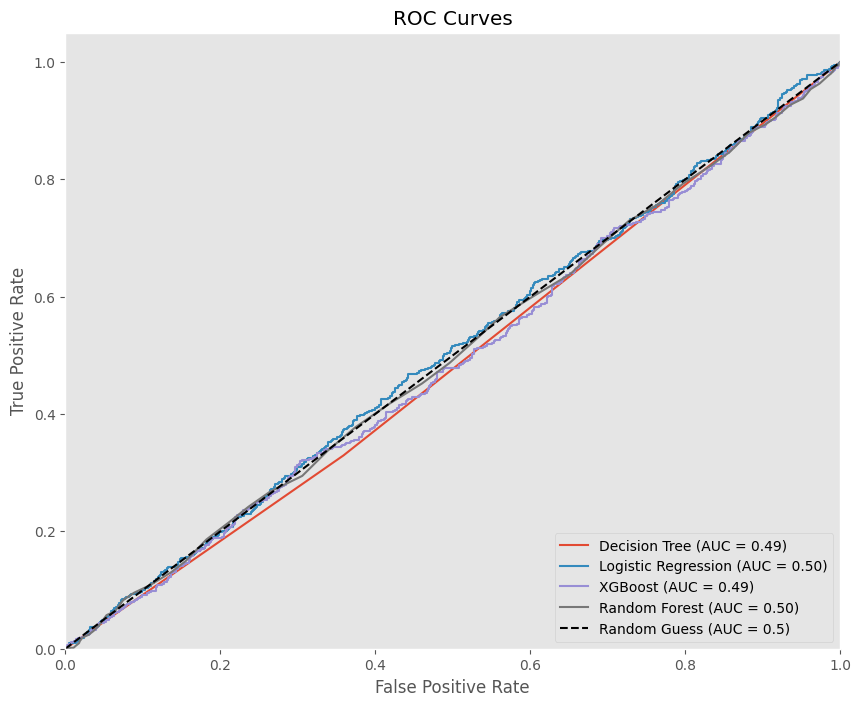

In [32]:
# Store the models and their predictions
model_predictions = {}
model_fprs = {}
model_tprs = {}
model_aucs = {}

# Train each model and store predictions for ROC curve
for name, model in classifiers.items():
    # Fit the model
    model.fit(X_train_top, y_train)

    # Get the probability predictions for the positive class
    y_proba = model.predict_proba(X_test_top)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Store results for plotting
    model_predictions[name] = y_proba
    model_fprs[name] = fpr
    model_tprs[name] = tpr
    model_aucs[name] = roc_auc

# Plotting
plt.figure(figsize=(10, 8))

for name in classifiers.keys():
    plt.plot(model_fprs[name], model_tprs[name], label=f'{name} (AUC = {model_aucs[name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Conclusion



Several classifier models were developed using the Heart Attack Risk dataset. In the data preprocessing stage, one-hot encoding was applied to categorical variables, and oversampling techniques were used to handle data imbalance. The dataset was split into training and test sets to ensure the reliability of model evaluation.

Random Forest emerged as the best-performing model after focusing on top features and conducting hyperparameter tuning, achieving the highest Recall and F1 scores, which aligned with our business objectives. However, despite efforts in addressing data imbalance, tuning hyperparameters, and analyzing feature importance, the overall performance improvement was modest.

These findings highlight the challenges of predictive modeling in healthcare, where even advanced techniques may yield limited gains. Nonetheless, the insights gained from this analysis can contribute valuable knowledge to the healthcare community, which continues to face difficulties in accurately predicting critical conditions like heart attacks.